In [18]:
!pip install missingpy
!pip install git+https://github.com/EvilTrtl/missingpy.git@patch-1

  Cloning https://github.com/EvilTrtl/missingpy.git (to revision patch-1) to /tmp/pip-req-build-gpp3k794
  Running command git clone --filter=blob:none --quiet https://github.com/EvilTrtl/missingpy.git /tmp/pip-req-build-gpp3k794
  Running command git checkout -b patch-1 --track origin/patch-1
  Switched to a new branch 'patch-1'
  Branch 'patch-1' set up to track remote branch 'patch-1' from 'origin'.
  Resolved https://github.com/EvilTrtl/missingpy.git to commit 58a6ead7d79a3096a54a07f17667e8e4a57c1f33
  Preparing metadata (setup.py) ... done


In [19]:
import sklearn.neighbors._base 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

### Importing Pandas, Numpy and Iris dataset

In [20]:
import numpy as np
import pandas as pd
iris = pd.read_csv("/kaggle/input/iris-dataset/iris_csv.csv")

### Analyzing the dataset

In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


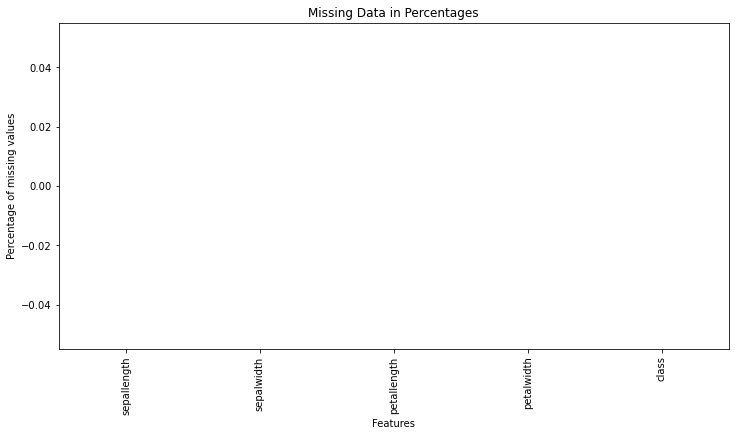

In [23]:
iris.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

### Creating a original copy for finding Imputation accuracy later on 

In [24]:
#Creating a untouched original copy for later
iris_orig = iris.copy()
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Generating random NaN values in the Sepal_width and petal_width features of the dataset

In [25]:
# Generate unique lists of random integers
inds1 = list(set(np.random.randint(0, len(iris), 10)))
inds2 = list(set(np.random.randint(0, len(iris), 15)))

# Replace the values at given index position with NaNs
iris['sepallength'] = [val if i not in inds1 else np.nan for i, val in enumerate(iris['sepallength'])]
iris['petalwidth'] = [val if i not in inds2 else np.nan for i, val in enumerate(iris['petalwidth'])]

# Get count of missing values by column
iris.isnull().sum()

sepallength    10
sepalwidth      0
petallength     0
petalwidth     14
class           0
dtype: int64

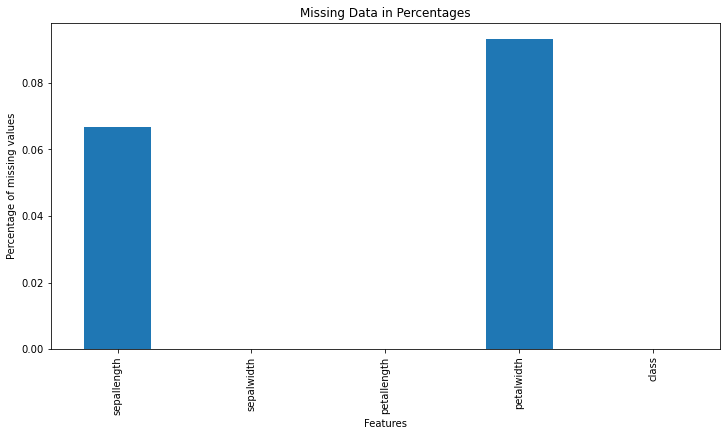

In [29]:
iris.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

### Performing the Imputation

In [27]:
from missingpy import MissForest
imputer = MissForest()
X = iris.drop('class', axis=1)
X_imputed = imputer.fit_transform(X)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 0


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 1


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 2


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 3


### 

In [28]:
# Add imputed values as columns to the untouched dataset
iris_orig['Imputed_sepal_length'] = X_imputed[:, 0]
iris_orig['Imputed_petal_width'] = X_imputed[:, -1]
comparison_df = iris_orig[['sepallength', 'Imputed_sepal_length', 'petalwidth', 'Imputed_petal_width']]

# Calculate absolute errors
comparison_df['ABS_ERROR_sepal_length'] = np.abs(comparison_df['sepallength'] - comparison_df['Imputed_sepal_length'])
comparison_df['ABS_ERROR_petal_width'] = np.abs(comparison_df['petalwidth'] - comparison_df['Imputed_petal_width'])

# Show only rows where imputation was performed
comparison_df.iloc[sorted([*inds1, *inds2])]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepallength,Imputed_sepal_length,petalwidth,Imputed_petal_width,ABS_ERROR_sepal_length,ABS_ERROR_petal_width
7,5.0,5.095000,0.2,0.200000,0.095000,0.000000
17,5.1,5.100000,0.3,0.220000,0.000000,0.080000
21,5.1,5.100000,0.4,0.225000,0.000000,0.175000
26,5.0,5.111000,0.4,0.400000,0.111000,0.000000
29,4.7,4.832900,0.2,0.200000,0.132900,0.000000
44,5.1,5.445000,0.4,0.400000,0.345000,0.000000
47,4.6,4.600000,0.2,0.219333,0.000000,0.019333
50,7.0,7.000000,1.4,1.497000,0.000000,0.097000
51,6.4,6.170110,1.5,1.500000,0.229890,0.000000
52,6.9,6.628000,1.5,1.500000,0.272000,0.000000
